# Biodiversity in National Parks
## Data Science Foundations Portfolio Project


### Structure
- 1. Introduction
- 2. Objectives
- 3. Preliminary data cleaning
- 4. Analysis
    - 4.1. Observations by Park
    - 4.2. Species Diversity
    - 4.3. Conservation Status
    - 4.4. Missing Values on Conservation Status
- 5. Conclusions

## 1. Introduction 

This is a Data Science Portfolio Project about Biodiversity in four National Parks of the United States of America, which analyses data about species, their classification, conservation status and the number of observations of the different species on each park.

For this project, the initial material consists in two datasets: one is called 'Observations' and another one is called 'Species'. Both come in the format of csv files.

## 2. Objectives

#### 1. Observations by Park:

- To analyze the distribution of observations across different national parks.
- To identify the parks with the highest and lowest biodiversity based on the number of observations

#### 2. Species Diversity:
- To explore the different categories of species and their distribution across parks.
- To investigate the most and least common species in the dataset.

#### 3. Conservation Status:
- To analyze the conservation status for species where it's available.
- To explore the distribution of species with conservation status across categories of species.

#### 4. Missing Values on Conservation Status:
- To investigate why there are so many null values in the conservation_status column.
- To check if there are patterns or reasons for missing conservation status information.

## 3. Preliminary data cleaning

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

obs_df = pd.read_csv('observations.csv')
spe_df = pd.read_csv('species_info.csv')

dfs = [obs_df, spe_df]

# First steps of EDA (Exploratory Data Analysis)
for i in dfs:
    print(i.info())
    display(i.describe(include = 'all'))
    display(i.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
# Changing data types to 'string' when it is 'object'
obs_df['scientific_name'] = obs_df['scientific_name'].astype('string')
obs_df['park_name'] = obs_df['park_name'].astype('string')
spe_df = spe_df.astype('string')

# Looking for duplicates in both DataFrames
print('- First check of duplicated values for the Observations and Species DataFrames:\n')
print("Duplicated values in the Observations DataFrame:\n", obs_df.duplicated().value_counts(), "\n")
print("Duplicated values in the Species Info DataFrame:\n", spe_df.duplicated().value_counts(), "\n")

# Dropping duplicated values on the observations DataFrame
obs_df = obs_df.drop_duplicates()
print('- Second check on duplicated values for the Observations DataFrame:\n')
print("Duplicated values in the Observations DataFrame after dropping duplicated:\n", obs_df.duplicated().value_counts())

# Taking out the 'National Park' postscript from the column 'park_name' in the Observations DataFrame
obs_df = obs_df.copy()
obs_df['park_name_simplified'] = obs_df.park_name.apply(lambda x: x.split(' National Park')[0])

# Creating of an 'all_data' DataFrame with both Species and Observations DataFrames concatenated
all_data = obs_df.merge(spe_df)
print('\n- First five rows of the all_data DataFrame, a combination of both Observations and Species DataFrames.')
display(all_data.head())

# Here is when I realize that there are duplicated rows because of different 'common_names' classification of the same
## species (all the rest of the information in the row is the same)
myotis = all_data[all_data.scientific_name == 'Myotis lucifugus']
print('\n- Here is when it becomse clear that there are duplicated rows because of different "common_names" classification. \n\
The same rows were included several times only because there are different common names for species in each one.')
display(myotis.head(12))

# I erase the column 'common_names', as it will not be used in this project
all_data = all_data.drop(['common_names'], axis=1)
print('- First check of duplicated values for all_data DataFrame after removing the common_names column:')
display(all_data.duplicated().value_counts())
all_data = all_data.drop_duplicates()
print('- Second check of duplicated values for all_data DataFrame after dropping duplicated rows:')
display(all_data.duplicated().value_counts())

- First check of duplicated values for the Observations and Species DataFrames:

Duplicated values in the Observations DataFrame:
 False    23281
True        15
dtype: int64 

Duplicated values in the Species Info DataFrame:
 False    5824
dtype: int64 

- Second check on duplicated values for the Observations DataFrame:

Duplicated values in the Observations DataFrame after dropping duplicated:
 False    23281
dtype: int64

- First five rows of the all_data DataFrame, a combination of both Observations and Species DataFrames.


,scientific_name,park_name,observations,park_name_simplified,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Great Smoky Mountains,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",<NA>
1,Vicia benghalensis,Yosemite National Park,148,Yosemite,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",<NA>
2,Vicia benghalensis,Yellowstone National Park,247,Yellowstone,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",<NA>
3,Vicia benghalensis,Bryce National Park,104,Bryce,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",<NA>
4,Neovison vison,Great Smoky Mountains National Park,77,Great Smoky Mountains,Mammal,American Mink,<NA>



- Here is when it becomse clear that there are duplicated rows because of different "common_names" classification. 
The same rows were included several times only because there are different common names for species in each one.


,scientific_name,park_name,observations,park_name_simplified,category,common_names,conservation_status
7232,Myotis lucifugus,Great Smoky Mountains National Park,57,Great Smoky Mountains,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
7233,Myotis lucifugus,Great Smoky Mountains National Park,57,Great Smoky Mountains,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
7234,Myotis lucifugus,Great Smoky Mountains National Park,57,Great Smoky Mountains,Mammal,Little Brown Myotis,Species of Concern
7235,Myotis lucifugus,Yellowstone National Park,239,Yellowstone,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
7236,Myotis lucifugus,Yellowstone National Park,239,Yellowstone,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
7237,Myotis lucifugus,Yellowstone National Park,239,Yellowstone,Mammal,Little Brown Myotis,Species of Concern
7238,Myotis lucifugus,Great Smoky Mountains National Park,59,Great Smoky Mountains,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
7239,Myotis lucifugus,Great Smoky Mountains National Park,59,Great Smoky Mountains,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
7240,Myotis lucifugus,Great Smoky Mountains National Park,59,Great Smoky Mountains,Mammal,Little Brown Myotis,Species of Concern
7241,Myotis lucifugus,Bryce National Park,103,Bryce,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern


- First check of duplicated values for all_data DataFrame after removing the common_names column:


False    23301
True      2300
dtype: int64

- Second check of duplicated values for all_data DataFrame after dropping duplicated rows:


False    23301
dtype: int64

In [12]:
# A new check on EDA after first cleaning of the data and joining both DataFrames in one 'all_data'
print(all_data.info())
display(all_data.describe(include = 'all'))
display(all_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23301 entries, 0 to 25600
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   scientific_name       23301 non-null  string
 1   park_name             23301 non-null  string
 2   observations          23301 non-null  int64 
 3   park_name_simplified  23301 non-null  object
 4   category              23301 non-null  string
 5   conservation_status   23301 non-null  string
dtypes: int64(1), object(1), string(4)
memory usage: 1.2+ MB
None


,scientific_name,park_name,observations,park_name_simplified,category,conservation_status
count,23301,23301,23301.00000,23301,23301,23301
unique,5541,4,NaN,4,7,5
top,Canis lupus,Bryce National Park,NaN,Bryce,Vascular Plant,missing data
freq,24,5828,NaN,5828,17867,22521
mean,NaN,NaN,142.22381,NaN,NaN,NaN
std,NaN,NaN,69.90452,NaN,NaN,NaN
min,NaN,NaN,9.00000,NaN,NaN,NaN
25%,NaN,NaN,86.00000,NaN,NaN,NaN
50%,NaN,NaN,124.00000,NaN,NaN,NaN
75%,NaN,NaN,195.00000,NaN,NaN,NaN


,scientific_name,park_name,observations,park_name_simplified,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Great Smoky Mountains,Vascular Plant,missing data
1,Vicia benghalensis,Yosemite National Park,148,Yosemite,Vascular Plant,missing data
2,Vicia benghalensis,Yellowstone National Park,247,Yellowstone,Vascular Plant,missing data
3,Vicia benghalensis,Bryce National Park,104,Bryce,Vascular Plant,missing data
4,Neovison vison,Great Smoky Mountains National Park,77,Great Smoky Mountains,Mammal,missing data


,scientific_name,park_name,observations,park_name_simplified,category,conservation_status
25596,Gulo gulo,Yosemite National Park,157,Yosemite,Mammal,missing data
25597,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Great Smoky Mountains,Vascular Plant,missing data
25598,Dichanthelium depauperatum,Bryce National Park,80,Bryce,Vascular Plant,missing data
25599,Dichanthelium depauperatum,Yellowstone National Park,255,Yellowstone,Vascular Plant,missing data
25600,Dichanthelium depauperatum,Yosemite National Park,162,Yosemite,Vascular Plant,missing data


In [5]:
# Checking for missing values
MaxRowsAllData = len(all_data)
print('% Missing Data on All Data dataset:')
print((1 - all_data.count() / MaxRowsAllData) * 100)

% Missing Data on All Data dataset:
scientific_name          0.000000
park_name                0.000000
observations             0.000000
park_name_simplified     0.000000
category                 0.000000
conservation_status     96.652504
dtype: float64


## 4. Analysis
### 4.1. Observations by Park

    park_name_simplified  observations
0                  Bryce        576195
1  Great Smoky Mountains        431537
2            Yellowstone       1443016
3               Yosemite        863209


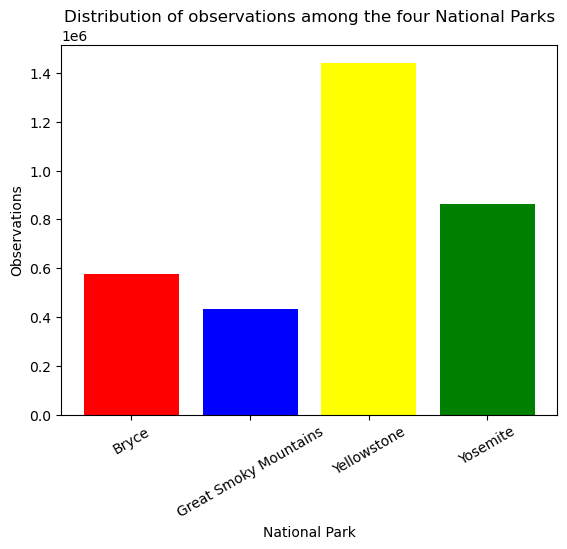

In [6]:
## To analyze the distribution of observations across different national parks.
## To identify the parks with the highest and lowest biodiversity based on the number of observations

obs_distribution = all_data.groupby('park_name_simplified').observations.sum().reset_index()
print(obs_distribution)

all_colors = ['red', 'blue', 'yellow', 'green']

plt.bar(obs_distribution.park_name_simplified, obs_distribution.observations, color=all_colors)
plt.title('Distribution of observations among the four National Parks')
plt.xticks(rotation = 30)
plt.xlabel('National Park')
plt.ylabel('Observations')
plt.show()

In [7]:
biodiversity_by_park = all_data.groupby('park_name_simplified').scientific_name.nunique().reset_index()
display(biodiversity_by_park)

# This was to make sure if there were different species among parks. Aparently, the same 5541 species are present
## in all four parks. Only the observations of each one changes. 

,park_name_simplified,scientific_name
0,Bryce,5541
1,Great Smoky Mountains,5541
2,Yellowstone,5541
3,Yosemite,5541


### 4.2. Species Diversity:

,category,observations
0,Amphibian,43971
1,Bird,292578
2,Fish,71631
3,Mammal,117155
4,Nonvascular Plant,190653
5,Reptile,44678
6,Vascular Plant,2553291


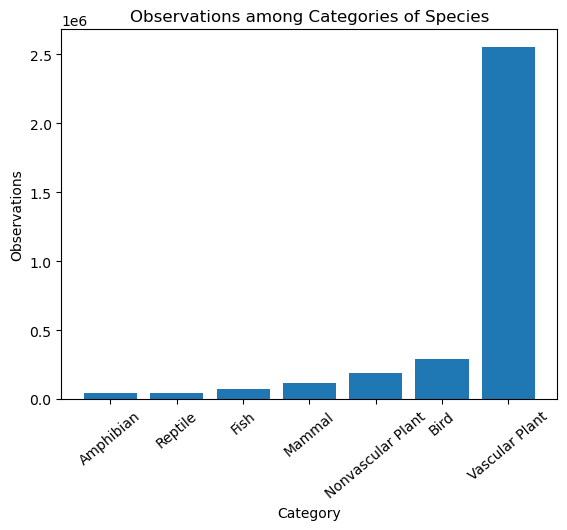

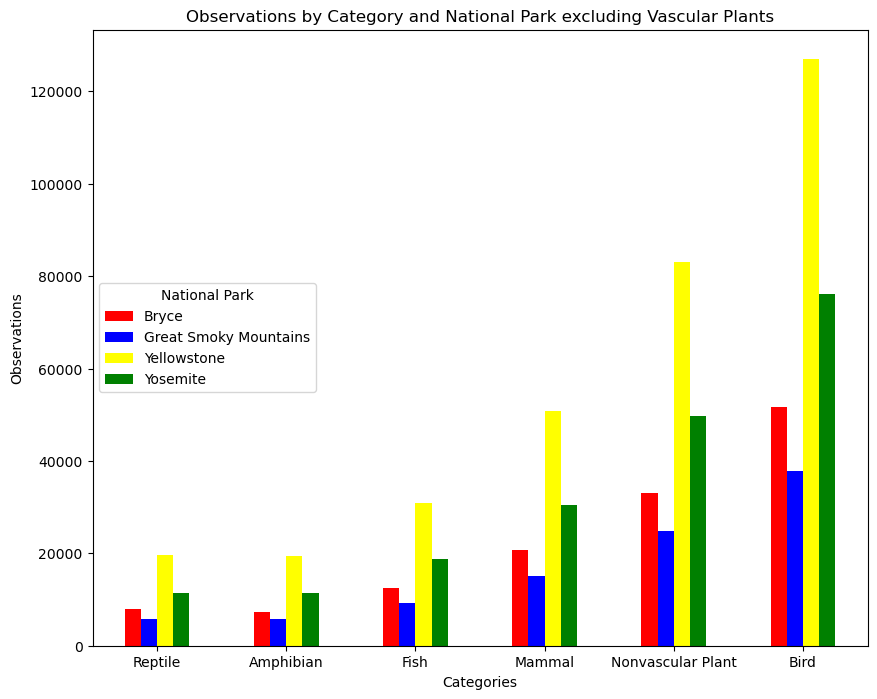

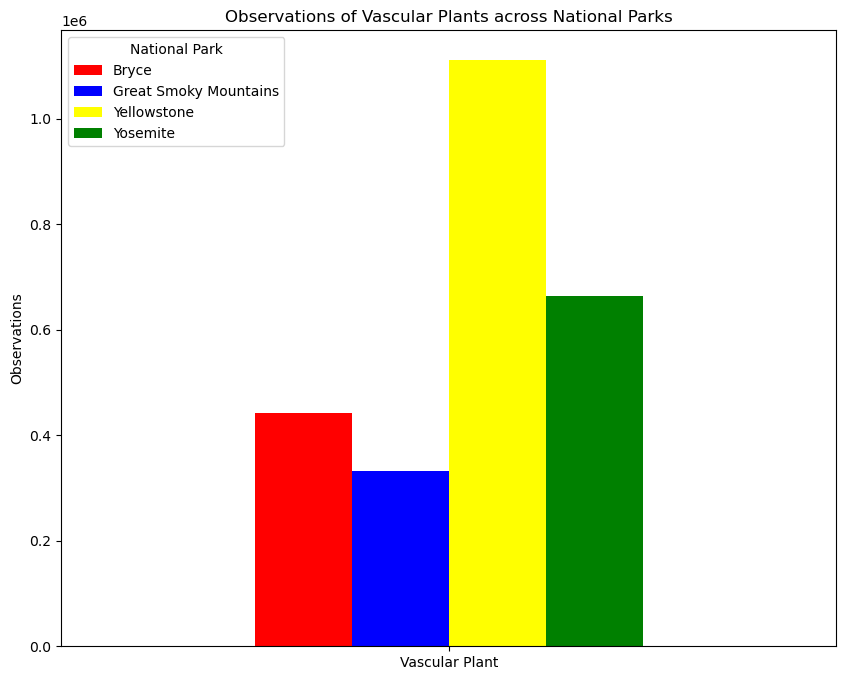

In [8]:
## To explore the different categories of species and their distribution across parks.
category_obs = all_data.groupby('category').observations.sum().reset_index()
display(category_obs)

plt.bar('category', 'observations', data=category_obs.sort_values('observations'))
ax = plt.subplot()
ax.set_xlabel('Category')
ax.set_ylabel('Observations')
plt.title('Observations among Categories of Species')
plt.xticks(rotation=40)
plt.show()

bryce_category_dist = all_data[all_data.park_name_simplified == 'Bryce']\
.groupby('category').observations.sum().reset_index()
greatsmoky_category_dist = all_data[all_data.park_name_simplified == 'Great Smoky Mountains']\
.groupby('category').observations.sum().reset_index()
yellowstone_category_dist = all_data[all_data.park_name_simplified == 'Yellowstone']\
.groupby('category').observations.sum().reset_index()
yosemite_category_dist = all_data[all_data.park_name_simplified == 'Yosemite']\
.groupby('category').observations.sum().reset_index()

all_category_df = pd.concat([
    bryce_category_dist.assign(Park='Bryce'),
    greatsmoky_category_dist.assign(Park='Great Smoky Mountains'),
    yellowstone_category_dist.assign(Park='Yellowstone'),
    yosemite_category_dist.assign(Park='Yosemite')
])

# As vascular plants observations are much higher than the rest of categories, I divide all_category_df into two
## DataFrames, one excluding vascular plants but including all the other categories, and the reverse
all_category_exc_vascular_plants = all_category_df[all_category_df['category'] != 'Vascular Plant']

pivot_df = all_category_exc_vascular_plants.pivot(index='category', columns='Park', values='observations')
pivot_df = pivot_df.sort_values('Great Smoky Mountains')
ax = pivot_df.plot(kind='bar', figsize=(10, 8), color=all_colors)
ax.set_xlabel('Categories')
ax.set_ylabel('Observations')
ax.set_title('Observations by Category and National Park excluding Vascular Plants')
ax.legend(title='National Park', loc=6)
plt.xticks(rotation = 0)
plt.show()

vascular_plants_df = all_category_df[all_category_df['category'] == 'Vascular Plant']

pivot_df = vascular_plants_df.pivot(index='category', columns='Park', values='observations')
ax = pivot_df.plot(kind='bar', figsize=(10, 8), color=all_colors)
ax.set_xlabel('')
ax.set_ylabel('Observations')
ax.set_title('Observations of Vascular Plants across National Parks')
ax.legend(title='National Park', loc=2)
plt.xticks(rotation = 0)
plt.show()

In [9]:
# Investigate the most and least common species in the dataset.
obs_by_scientific_name = all_data.groupby(['scientific_name']).observations.sum().reset_index()

least_common_species = (obs_by_scientific_name[obs_by_scientific_name.observations == \
                                               obs_by_scientific_name.observations.min()].iloc[0].scientific_name)

most_common_species = (obs_by_scientific_name[obs_by_scientific_name.observations == \
                                               obs_by_scientific_name.observations.max()].iloc[0].scientific_name)

least_common_species_observations = obs_by_scientific_name[obs_by_scientific_name.scientific_name == 
                             least_common_species].observations.squeeze()

most_common_species_observations = obs_by_scientific_name[obs_by_scientific_name.scientific_name == 
                             most_common_species].observations.squeeze()

print(f"The least common species is '{least_common_species}' with {least_common_species_observations} observations, and the most common species is \n'{most_common_species}' with {most_common_species_observations} observations.")

The least common species is 'Grus americana' with 131 observations, and the most common species is 
'Holcus lanatus' with 1780 observations.


### 4.3. Conservation Status:

,category,observations
0,Amphibian,2752
1,Bird,38608
2,Fish,4209
3,Mammal,17164
4,Nonvascular Plant,2705
5,Reptile,2536
6,Vascular Plant,22849


,category,conservation_status,observations
0,Amphibian,Endangered,144
1,Amphibian,Species of Concern,2044
2,Amphibian,Threatened,564
3,Bird,Endangered,574
4,Bird,In Recovery,1392
5,Bird,Species of Concern,36642
6,Fish,Endangered,455
7,Fish,Species of Concern,2109
8,Fish,Threatened,1645
9,Mammal,Endangered,1463


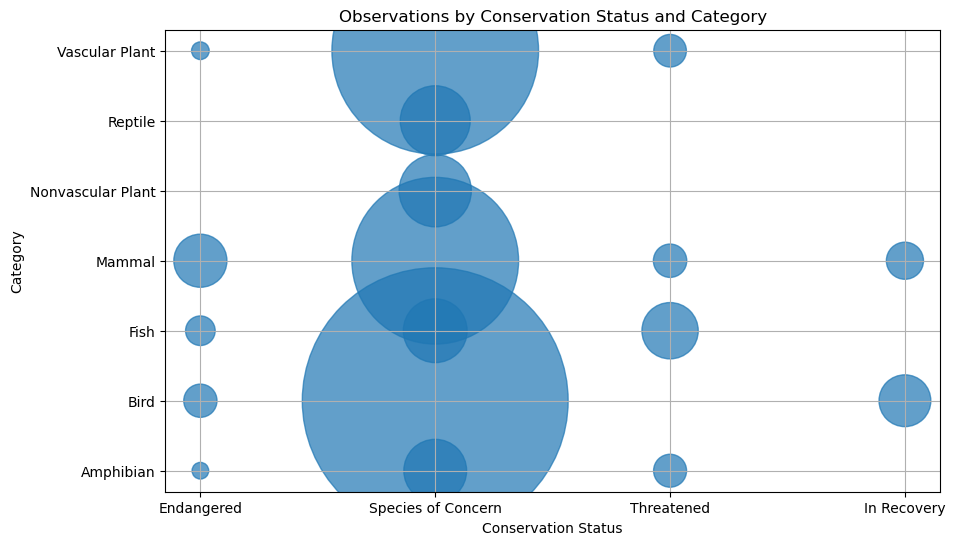

In [10]:
## To analyze the conservation status for species where it's available.
## To explore the distribution of species with conservation status across categories of species.

conservation_df = all_data.dropna(subset=['conservation_status'])
conservation_df_by_category = conservation_df.groupby(['category']).agg({'observations': 'sum'}).reset_index()
conservation_status_df_by_category = conservation_df.groupby(['category', 'conservation_status']).agg({'observations': 'sum'}).reset_index()

display(conservation_df_by_category)
display(conservation_status_df_by_category)

plt.figure(figsize=(10, 6))
plt.scatter(conservation_status_df_by_category['conservation_status'], conservation_status_df_by_category['category'], s=conservation_status_df_by_category['observations'], alpha=0.7)
plt.title('Observations by Conservation Status and Category')
plt.xlabel('Conservation Status')
plt.ylabel('Category')
plt.grid(True)
plt.show()

### 4.4. Missing Values on Conservation Status

In [11]:
## To investigate why there are so many null values in the conservation_status column.
## To check if there are patterns or reasons for missing conservation status information.

missing_conservation_status_by_category_df = pd.merge(category_obs.rename(columns={'observations': 'total_observations'}), \
                                         conservation_df_by_category.rename(columns={'observations': 'not_missing_conservation_status_observations'}))

missing_conservation_status_by_category_df['missing_conservation_status_percentage'] = missing_conservation_status_by_category_df.apply(\
                                lambda row: 100 - (100 * row['not_missing_conservation_status_observations']/row['total_observations']), axis=1)

display(missing_conservation_status_by_category_df)

all_data = all_data.fillna('missing data')
missing_conservation_status_by_park = all_data[all_data.conservation_status == 'missing data']
missing_conservation_status_by_park = missing_conservation_status_by_park.groupby('park_name_simplified').conservation_status.count().reset_index()
missing_conservation_status_by_park = missing_conservation_status_by_park.rename(columns={'conservation_status': 'rows_missing_conservation_status'})

display(missing_conservation_status_by_park)

# It seems there isn't an obvious pattern which explains why there is so much missing data.
# Therefore, this data must be missing not at random, even thought I cannot find out why. 

,category,total_observations,not_missing_conservation_status_observations,missing_conservation_status_percentage
0,Amphibian,43971,2752,93.741330
1,Bird,292578,38608,86.804203
2,Fish,71631,4209,94.124052
3,Mammal,117155,17164,85.349324
4,Nonvascular Plant,190653,2705,98.581192
5,Reptile,44678,2536,94.323828
6,Vascular Plant,2553291,22849,99.105116


,park_name_simplified,rows_missing_conservation_status
0,Bryce,5633
1,Great Smoky Mountains,5628
2,Yellowstone,5629
3,Yosemite,5631


## 5. Conclusions

The national park with the highest number of observed species is Yellowstone National Park, followed by Yosemite National Park, Bryce National Park, and lastly, the Great Smoky Mountains National Park.

Regarding the quantity of species in each category, the vast majority belong to the vascular plants category, followed by birds, nonvascular plants, mammals, fishes, reptiles, and amphibians. If we look at the distribution by parks, the same order is maintained in each park. However, examining the graph 'Observations by Category and National Park excluding Vascular Plants' a similar number of reptiles and amphibians is observed in the Great Smoky Mountains National Park. As mentioned before, the least common species is 'Grus americana' with 131 observations, and the most common species is 'Holcus lanatus' with 1780 observations.

In relation to the conservation status, although it is barely recorded, with around 97% of the data missing, an analysis has been conducted using the available data. From this analysis, it is observed that the majority of species with conservation status available fall into the 'Species of Concern' category, where at least one individual of each species is present, especially among birds, vascular plants, and mammals. In the 'Endangered' category, there are records of mammals, birds, fishes, vascular plants, and amphibians, in that order. Under 'Threatened,' there are records primarily for fishes but also for vascular plants, mammals, and amphibians. 'Recovery' includes only two types of animals: mammals and birds.

Finally, as confirmed in the data preprocessing, there is a lot of missing information regarding the conservation status. After investigating potential causes, it has been concluded that there are no discernible patterns explaining this phenomenon. However, the reason behind this can be explained very easily: if a species is not in danger, then it will not have a convervation status. That's why so many fields are blank, the majority of species of the four National Parks enjoy good health!